In [1]:
from urllib import request 
import logging
from pathlib import Path
import numpy as np
import re
import MeCab
import random
from gensim import corpora, models
import pandas as pd
from tqdm import tqdm

In [6]:
from gensim import models, corpora, similarities
lda = models.ldamodel.LdaModel.load("lda5.model")
corpus = corpora.MmCorpus("corpus/bow_copus_from_dict2014-2018.mm")
d = corpora.Dictionary.load("dictionary_test/dict2014_2018.dict")

In [18]:
# corpus = [d.doc2bow(w) for w in share_list]
test_size = int(len(corpus) * 0.1)
test_corpus = corpus[:test_size]
train_corpus= corpus[test_size:]
print("test size: ", len(test_corpus))
print("train size: ", len(train_corpus))

test size:  8384
train size:  75458


In [4]:
import math

from wordcloud import WordCloud
from PIL import Image

import matplotlib
matplotlib.use('Agg') 
import matplotlib.pylab as plt
font = {'family': 'IPAGothic'}
jp_font = {'fontname':'IPAGothic'}
jp_font = {'fontname':'IPAGothic'} # 日本語フォント設定を作成
matplotlib.rc('font', **font)
plt.rc('font', **font)
%matplotlib inline

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


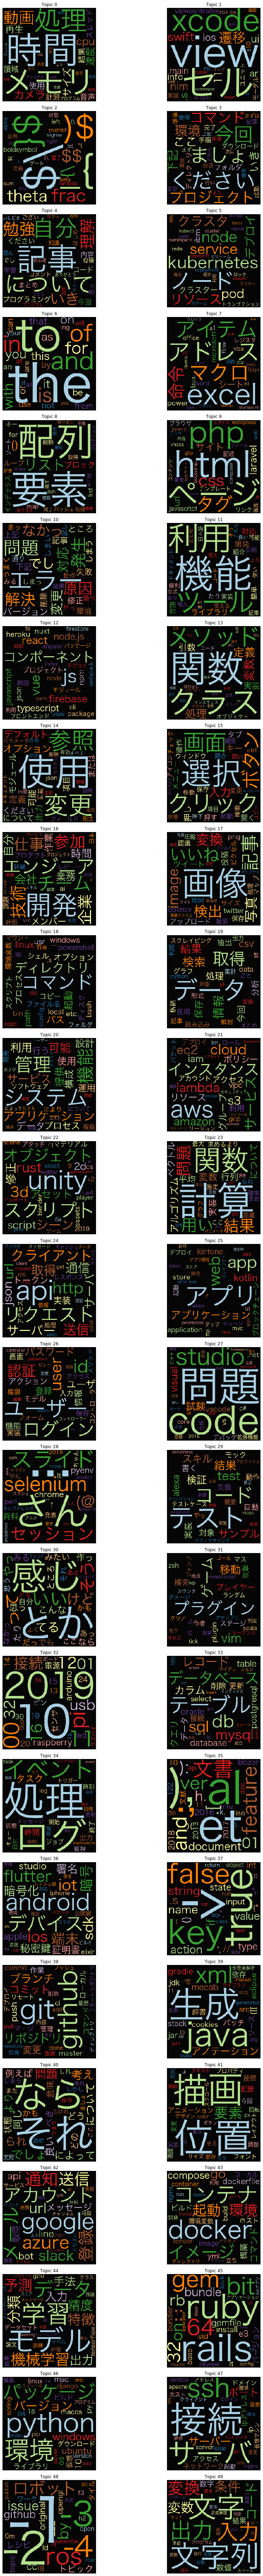

In [7]:
# WordCloud

fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda.num_topics/2), figsize=(16,100))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
#         font_path="/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf",
        font_path = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
        background_color='black',
        color_func=color_func,
        max_words=4000,
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

# vis
plt.tight_layout()
# plt.show()

# save as png
plt.savefig('wordcloud.png') 